In [233]:
# Web Scrapping
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
#library to deal with warning
import warnings
warnings.filterwarnings('ignore')

In [52]:
link = "https://www.flipkart.com/search?q=TV&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [53]:
page = requests.get(link)

In [54]:
page

<Response [200]>

In [55]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple

In [56]:
soup=bs(page.content,'html.parser')

In [44]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/appl

In [57]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.07395f.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

In [58]:
mainbox = soup.find_all("div",{"class":"_2kHMtA"})

In [62]:
len(mainbox)

24

In [63]:
box = mainbox[0]

In [64]:
box.find("div",{"class":"_4rR01T"}).text

'iFFALCON by TCL AI Powered K31 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with HDR 10'

In [50]:
box.find("div",{"class":"_4rR01T"}).text.strip()

'iFFALCON by TCL AI Powered K31 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with HDR 10'

In [65]:
name = box.find("div",{"class":"_4rR01T"}).text.strip()

In [66]:
discounted_price= box.find("div",{"class":"_30jeq3 _1_WHN1"}).text.strip()
rating= box.find("div",{"class":"_3LWZlK"}).text.strip()
original_price = box.find("div",{"class":"_3I9_wc _27UcVY"}).text.strip()
discount_percent = box.find("div",{"class":"_3Ay6Sb"}).text.strip()
Feature= box.find("div",{"class":"fMghEO"}).text.strip()

In [68]:
print(name)
print(original_price)
print(discount_percent)
print(discounted_price)
print(Feature)

iFFALCON by TCL AI Powered K31 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with HDR 10
₹47,990
49% off
₹23,999
Netflix|Prime Video|Disney+Hotstar|YoutubeOperating System: AndroidUltra HD (4K) 3840 x 2160 Pixels20 W Speaker Output60 Hz Refresh Rate2 x HDMI | 1 x USBA+ Grade UHD 10-bit DLED Panel1 Year Warranty on Product


In [182]:
data_list=[]
for box in mainbox:
    temp_dict={}
    temp_dict['Product_name']=box.find("div",{"class":"_4rR01T"}).text.strip()
    if box.find("div",{"class":"_3I9_wc _27UcVY"}):
        temp_dict['Original_price']= box.find("div",{"class":"_3I9_wc _27UcVY"}).text.replace('₹','').strip()
    else:
        temp_dict['Original_price']= box.find("div",{"class":"_30jeq3 _1_WHN1"}).text.replace('₹','').strip()
    temp_dict['Discounted_price']=box.find("div",{"class":"_30jeq3 _1_WHN1"}).text.replace('₹','').strip()
    if box.find("div",{"class":"_3Ay6Sb"}):
        temp_dict['Discount_percent']= box.find("div",{"class":"_3Ay6Sb"}).text.replace('% off',"").strip()
    else:
        temp_dict['Discount_percent']= '0'
    temp_dict['rating']=box.find("div",{"class":"_3LWZlK"}).text.strip()
    temp_dict['Feature']=box.find("div",{"class":"fMghEO"}).text.strip()
    data_list.append(temp_dict)

In [183]:
data_list

[{'Product_name': 'iFFALCON by TCL AI Powered K31 108 cm (43 inch) Ultra HD (4K) LED Smart Android TV with HDR 10',
  'Original_price': '47,990',
  'Discounted_price': '23,999',
  'Discount_percent': '49',
  'rating': '4.4',
  'Feature': 'Netflix|Prime Video|Disney+Hotstar|YoutubeOperating System: AndroidUltra HD (4K) 3840 x 2160 Pixels20 W Speaker Output60 Hz Refresh Rate2 x HDMI | 1 x USBA+ Grade UHD 10-bit DLED Panel1 Year Warranty on Product'},
 {'Product_name': 'SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV 2020 Edition with Voice Search',
  'Original_price': '20,900',
  'Discounted_price': '17,999',
  'Discount_percent': '13',
  'rating': '4.4',
  'Feature': 'Netflix|Disney+Hotstar|YoutubeOperating System: TizenHD Ready 1366 x 768 Pixels20 W Speaker Output60 Hz Refresh Rate2 x HDMI | 1 x USB1 Year Comprehensive Warranty on Product and 1 Year Additional warranty on Panel'},
 {'Product_name': 'Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart Android TV with Google Data Saver',
  'Origi

In [184]:
df=pd.DataFrame(data_list)

In [185]:
df

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990","23,999",49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV ...,"20,900","17,999",13,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"14,999","14,499",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
3,LG 80 cm (32 inch) HD Ready LED Smart TV 2020 ...,"21,990","16,999",22,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,Mi 4A Pro 108 cm (43 inch) Full HD LED Smart A...,"25,999","24,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
5,Mi 4X 108 cm (43 inch) Ultra HD (4K) LED Smart...,"28,999","27,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
6,Mi 4X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"34,999","34,999",0,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
7,OnePlus Y Series 108 cm (43 inch) Full HD LED ...,"29,999","25,999",13,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
8,Mi 4A 100 cm (40 inch) Full HD LED Smart Andro...,"24,999","21,999",12,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
9,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"52,990","34,999",33,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      24 non-null     object
 1   Original_price    22 non-null     object
 2   Discounted_price  24 non-null     object
 3   Discount_percent  22 non-null     object
 4   rating            24 non-null     object
 5   Feature           24 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB


In [186]:
df.to_csv('WebScrapingTV.csv', index=False)

In [235]:
df1=pd.read_csv('WebScrapingTV.csv')

In [236]:
df1

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990","23,999",49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV ...,"20,900","17,999",13,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"14,999","14,499",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
3,LG 80 cm (32 inch) HD Ready LED Smart TV 2020 ...,"21,990","16,999",22,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,Mi 4A Pro 108 cm (43 inch) Full HD LED Smart A...,"25,999","24,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
5,Mi 4X 108 cm (43 inch) Ultra HD (4K) LED Smart...,"28,999","27,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
6,Mi 4X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"34,999","34,999",0,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
7,OnePlus Y Series 108 cm (43 inch) Full HD LED ...,"29,999","25,999",13,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
8,Mi 4A 100 cm (40 inch) Full HD LED Smart Andro...,"24,999","21,999",12,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
9,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"52,990","34,999",33,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...


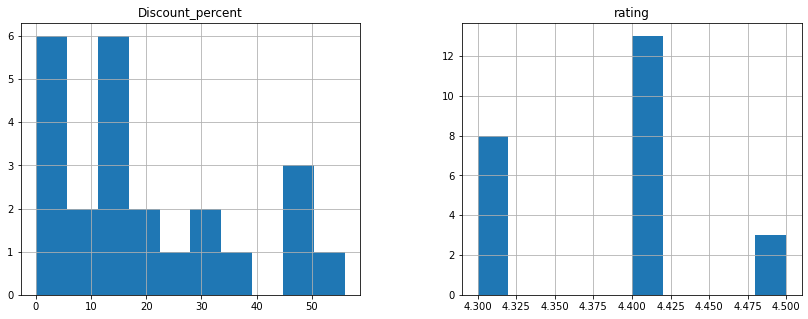

In [237]:
# Plot Histograms of Price and Rating
import seaborn as sns
import matplotlib.pyplot as plt

df1.hist(figsize=(14,5))
plt.show()

In [242]:
Filter1_df=df[df['Feature'].str.contains('Netflix',na=False)]
Filter1_df

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990","23,999",49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV ...,"20,900","17,999",13,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"14,999","14,499",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
3,LG 80 cm (32 inch) HD Ready LED Smart TV 2020 ...,"21,990","16,999",22,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,Mi 4A Pro 108 cm (43 inch) Full HD LED Smart A...,"25,999","24,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
5,Mi 4X 108 cm (43 inch) Ultra HD (4K) LED Smart...,"28,999","27,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
6,Mi 4X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"34,999","34,999",0,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
7,OnePlus Y Series 108 cm (43 inch) Full HD LED ...,"29,999","25,999",13,4.3,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
8,Mi 4A 100 cm (40 inch) Full HD LED Smart Andro...,"24,999","21,999",12,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
9,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"52,990","34,999",33,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...


In [243]:
Filter2_df=Filter1_df[Filter1_df['rating']>='4.4']
Filter2_df

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990","23,999",49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
1,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV ...,"20,900","17,999",13,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"14,999","14,499",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
4,Mi 4A Pro 108 cm (43 inch) Full HD LED Smart A...,"25,999","24,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
5,Mi 4X 108 cm (43 inch) Ultra HD (4K) LED Smart...,"28,999","27,999",3,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
6,Mi 4X 125.7 cm (50 inch) Ultra HD (4K) LED Sma...,"34,999","34,999",0,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
8,Mi 4A 100 cm (40 inch) Full HD LED Smart Andro...,"24,999","21,999",12,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
9,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"52,990","34,999",33,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
10,Mi 4A Horizon Edition 80 cm (32 inch) HD Ready...,"15,999","15,999",0,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
13,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,"1,99,900","1,29,999",34,4.5,Netflix|Disney+Hotstar|YoutubeOperating System...


In [244]:
Filter3_df=Filter2_df[Filter2_df['Discount_percent']>'30']
Filter3_df

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990","23,999",49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
9,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"52,990","34,999",33,4.4,Netflix|Disney+Hotstar|YoutubeOperating System...
13,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,"1,99,900","1,29,999",34,4.5,Netflix|Disney+Hotstar|YoutubeOperating System...
19,Iffalcon 138.6 cm (55 inch) QLED Ultra HD (4K)...,"1,26,990","54,999",56,4.5,Netflix|Disney+Hotstar|YoutubeOperating System...


In [246]:
Filter4_df=Filter3_df
Filter4_df['Discounted_price']=Filter4_df['Discounted_price'].str.replace(',',"")

Filter4_df["Discounted_price"]=pd.to_numeric(Filter4_df["Discounted_price"])
Filter4_df.info

<bound method DataFrame.info of                                          Product_name Original_price  \
0   iFFALCON by TCL AI Powered K31 108 cm (43 inch...         47,990   
9      LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV         52,990   
13  SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...       1,99,900   
19  Iffalcon 138.6 cm (55 inch) QLED Ultra HD (4K)...       1,26,990   

    Discounted_price Discount_percent rating  \
0              23999               49    4.4   
9              34999               33    4.4   
13            129999               34    4.5   
19             54999               56    4.5   

                                              Feature  
0   Netflix|Prime Video|Disney+Hotstar|YoutubeOper...  
9   Netflix|Disney+Hotstar|YoutubeOperating System...  
13  Netflix|Disney+Hotstar|YoutubeOperating System...  
19  Netflix|Disney+Hotstar|YoutubeOperating System...  >

In [250]:
Filter4_df=Filter4_df.sort_values(by='Discounted_price')
Filter4_df.head(1)

,Product_name,Original_price,Discounted_price,Discount_percent,rating,Feature
0,iFFALCON by TCL AI Powered K31 108 cm (43 inch...,"47,990",23999,49,4.4,Netflix|Prime Video|Disney+Hotstar|YoutubeOper...
